In [107]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv('/Users/indobadial/Downloads/diabetes.csv')

In [70]:
y = df['Outcome'].values
X = df.drop('Outcome', axis=1).values


In [88]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df.shape

(768, 9)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [96]:
#KNN classification Model
knn = KNeighborsClassifier(n_neighbors=27)#sqaure root of total observations
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=27)

In [100]:
ss=StandardScaler()#scaling required for KNN model so the algorithm is not dominated by higher magnitude variables
X=ss.fit_transform(X)
y_predict=knn.predict(X) #predict label for training data
X_new_=np.array([1,85,66,29,0,26.6,.351,31]).reshape(1,-1)
new_point_prediction=knn.predict(X_new)#predict whether new data point individual is diabetic or not
print(new_point_prediction)

[0]


In [101]:
#Model Evaluation
#Accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state=42, stratify=y)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy Score:",knn.score(X_test, y_test))
#since there is a class imbalance of 34% positives to 66% negatives, the accuracy score isn't very helpful

Accuracy Score: 0.7586206896551724


In [102]:
#more nuanced model measures
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#precision = tp/(tp+fp),recall=tp/(tp+fn),f1=(2*precision*recall)/(precision+recall)

[[66 10]
 [18 22]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.82        76
           1       0.69      0.55      0.61        40

    accuracy                           0.76       116
   macro avg       0.74      0.71      0.72       116
weighted avg       0.75      0.76      0.75       116



In [115]:
#Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[62 14]
 [16 24]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        76
           1       0.63      0.60      0.62        40

    accuracy                           0.74       116
   macro avg       0.71      0.71      0.71       116
weighted avg       0.74      0.74      0.74       116



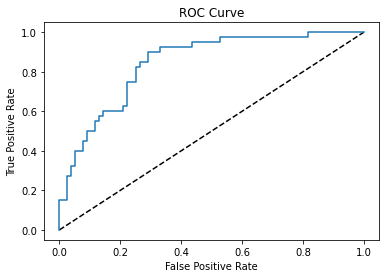

In [108]:
#visually assess model using ROC curve
y_predicted_prob=logreg.predict_proba(X_test)[:,1] #predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob)#ROC values
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show() #best models have curve in top left and worst models have curve along diagonal
#IOW, the larger the area under the ROC curve, the better the model

In [109]:
#AUC score
roc_auc_score(y_test,y_predicted_prob)#want this close to 1

0.84375

In [114]:
#Gaussian Naive Bayes classification, recall features are assumed to be independent from each other
#use this over Bernoulli and Multinomial naive Baye's since features are continuous and not discrete
model = GaussianNB()
model.fit(X,y)
predicted= model.predict(X_new) 
print ("Predicted Value:", predicted)

Predicted Value: [1]


In [117]:
#Gaussian Model Evaluation
model=GaussianNB()
model.fit(X_train,y_train)
y_predicted_gaussian=model.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_predicted_gaussian))
print(confusion_matrix(y_test, y_predicted_gaussian))
print(classification_report(y_test, y_predicted_gaussian))

Accuracy Score: 0.75
[[59 17]
 [12 28]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        76
           1       0.62      0.70      0.66        40

    accuracy                           0.75       116
   macro avg       0.73      0.74      0.73       116
weighted avg       0.76      0.75      0.75       116

